In [1]:
import tensorflow as tf
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2]:
main_folder = os.getcwd()
parent_folder= os.path.dirname(main_folder)
data_folder = os.path.join(parent_folder,"UCI HAR Dataset")
print(data_folder)

G:\Software Lab Notebook\UCI HAR Dataset


## Feature Analysis

In [3]:
features = []
with open(os.path.join(data_folder,"features.txt")) as file:
    for line in file:
        features.append(line.split()[1])
                
# SERIALIZING DUPLICATE FEATURE NAMES
names = []
count = {}
for feature in features:
    if(features.count(feature) > 1):
        names.append(feature)
for name in names:
    count[name] = features.count(name)
    
for i in range(len(features)):
    if(features[i] in names):
        num = count[features[i]]
        count[features[i]] -= 1;
        features[i] = str(features[i] + str(num))
print(features)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

## Data Loading

In [4]:
def load_data(root, features, train=True):
    if train == True: 
        dataset_type = 'train'
    else: 
        dataset_type = 'test'
        
    raw_data = pd.read_csv(os.path.join(root, dataset_type, f"X_{dataset_type}.txt"), 
                           delim_whitespace = True,
                           names = features)
    
    raw_data['subject_id'] = pd.read_csv(os.path.join(root, dataset_type, f"subject_{dataset_type}.txt"),header=None,squeeze=True)
    raw_data['activity'] = pd.read_csv(os.path.join(root, dataset_type, f"y_{dataset_type}.txt"),header=None,squeeze=True)
    activity = pd.read_csv(os.path.join(root, dataset_type, f"y_{dataset_type}.txt"),header=None,squeeze=True)
    label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
    raw_data["activity_name"] = label_name
    raw_data['activity'] -= 1
    #Storing data into a csv file
    #raw_data.to_csv(os.path.join(root,dataset_type,f"{dataset_type}.csv"), index= False)
    
    return raw_data

## Visualizing Activities

In [5]:
plot_folder = os.path.join(main_folder,"Results Visualization")
pathExists = os.path.exists(plot_folder)
if not pathExists:
    os.mkdir(plot_folder)

def activity_visualizing(activity_name, train=True): 
    if train == True: 
        dataset_type = 'train'
    else: 
        dataset_type = 'test'
        
    activity_name = list(activity_name)
    activity_freq={}
    for items in activity_name:
        activity_freq[items] = activity_name.count(items)
    #Extracting x and y coordinates
    Activities = activity_freq.keys()
    Counts = activity_freq.values()
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(Activities, Counts, color ='maroon',
        width = 0.4)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title(f"Count of each activity ({dataset_type} data set)")
    plt.tick_params(labelsize = 8)
    plt.xticks(rotation = 45)
    plt.show()
    file_name = f'Activity visualization_{dataset_type}.png'
    fig.savefig(os.path.join(plot_folder, file_name))

## Function Calls For Data Loading & Visualization

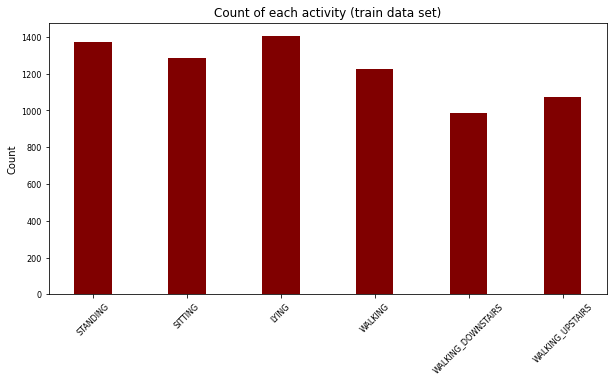

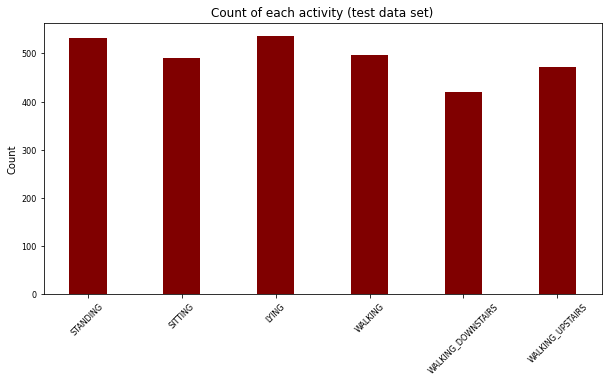

In [6]:
# Loading train and test data
raw_data_train = load_data(root=data_folder, features=features, train= True)
raw_data_test = load_data(root=data_folder, features=features, train= False)

#Data Visualization
activity_visualizing(activity_name = raw_data_train['activity_name'],train=True)#Train set
activity_visualizing(activity_name = raw_data_test['activity_name'],train=False)#Test set

## Preprocessing

In [7]:
def preprocessing(raw_data):
    # SHUFFLING DATA
    shuffled_data = shuffle(raw_data)
    shuffled_data= shuffled_data.reset_index(drop=True)
    
    
    # SEPERATING LABEL
    #print(list(shuffled_data.columns.values))
    label = shuffled_data['activity']
    #print("LABELSSSSS",label)
    
    # DROP COLUMNS WITH METADATA
    preprocessed_data = shuffled_data.drop(['activity','activity_name','subject_id'], axis=1)
    #print("PRESPROCESSED DATA\n", preprocessed_data)
    
    scaler = MinMaxScaler()
    scaler.fit(preprocessed_data)
    preprocessed_data = scaler.transform(preprocessed_data)
    label = np.array(label)
    print(preprocessed_data, label)
    
    return preprocessed_data, label

In [8]:
#Preprocessing
data_train, label_train = preprocessing(raw_data = raw_data_train)#train
data_test, label_test = preprocessing(raw_data = raw_data_test)#test

[[0.63465065 0.50394588 0.47465922 ... 0.08120185 0.8185688  0.51416248]
 [0.6396001  0.49114279 0.44541932 ... 0.12051994 0.85529206 0.51522801]
 [0.63743127 0.49081778 0.44866332 ... 0.17434494 0.61976886 0.4262749 ]
 ...
 [0.61021734 0.49377083 0.45383545 ... 0.07768092 0.79469369 0.4695089 ]
 [0.638725   0.49239321 0.44316751 ... 0.12860284 0.86224081 0.52006668]
 [0.63671948 0.49192552 0.44590531 ... 0.72491496 0.20337405 0.35958939]] [0 4 3 ... 0 4 5]
[[0.68819906 0.53623265 0.44072864 ... 0.00543138 0.5322905  0.49345806]
 [0.62455433 0.55898372 0.45598238 ... 0.0734384  0.52300129 0.55966197]
 [0.69967168 0.57333611 0.43166631 ... 0.76107534 0.31822366 0.13905958]
 ...
 [0.69081839 0.57965727 0.43906508 ... 0.14193053 0.62687631 0.49115521]
 [0.559281   0.59517789 0.42911418 ... 0.0962585  0.57462257 0.5563975 ]
 [0.66568003 0.5902776  0.48597892 ... 0.17287874 0.64766154 0.49610731]] [3 3 5 ... 4 2 0]


# Global Variables

In [17]:
epochs=25
batch_size=64
num_classes=6
fig_size=(9,7)

## Models

In [18]:
#MLP
def MLP(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

#CNN
def CNN(data_train_reshaped):
    n_timesteps = data_train_reshaped.shape[1] #561
    n_features = data_train_reshaped.shape[2] #1
    
    model = Sequential()
    model.add(Input(shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


## Compile and Fit Functions

In [19]:
def Compile(model):
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def Fit(model, data_train, label_train, i):
    history = model.fit(
    data_train,
    label_train,
    epochs=epochs,
    validation_split=0.2,
    batch_size=batch_size,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=1)
    return history, model

## Plot function for Loss & Accuracy

In [20]:
def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

## MLP Evaluation

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               143872    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)               

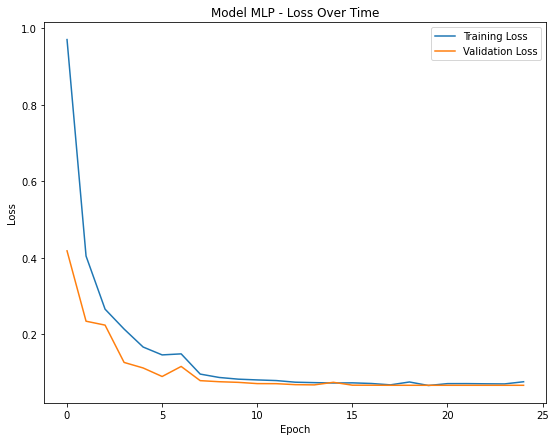

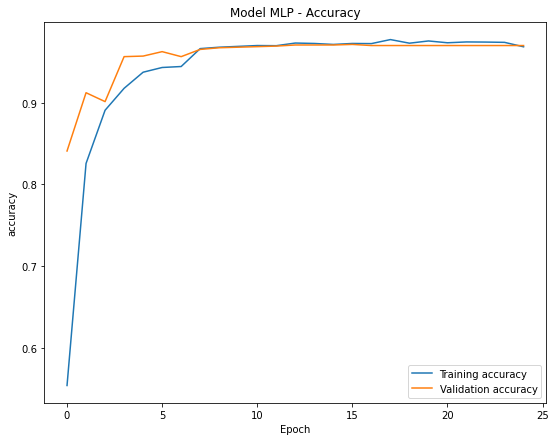

In [21]:
model_MLP = MLP(data_train.shape[1])
model_MLP.summary()

model_MLP = Compile(model_MLP)
history_MLP, model_MLP = Fit(model_MLP, data_train, label_train, "mlp")
PLOT(history_MLP, "MLP")



In [22]:
mlp_loss, mlp_accuracy = model_MLP.evaluate(data_test, label_test, verbose=1)
print('Model Loss: %.2f, Accuracy: %.2f' % ((mlp_loss*100),(mlp_accuracy*100)))

93/93 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8639
Model Loss: 45.32, Accuracy: 86.39


## CNN Evaluation

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 559, 64)           256       
                                                                 
 dropout_8 (Dropout)         (None, 559, 64)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 557, 64)           12352     
                                                                 
 dropout_9 (Dropout)         (None, 557, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 278, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17792)             0         
                                                      

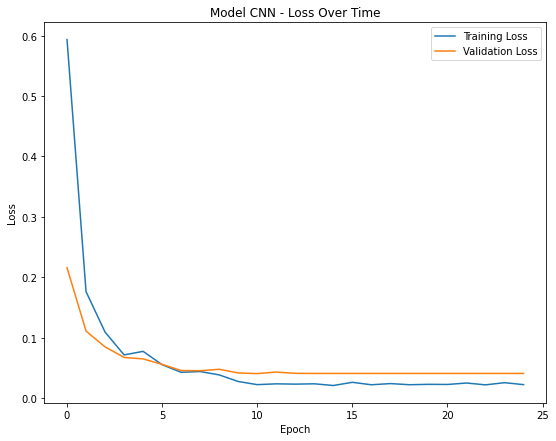

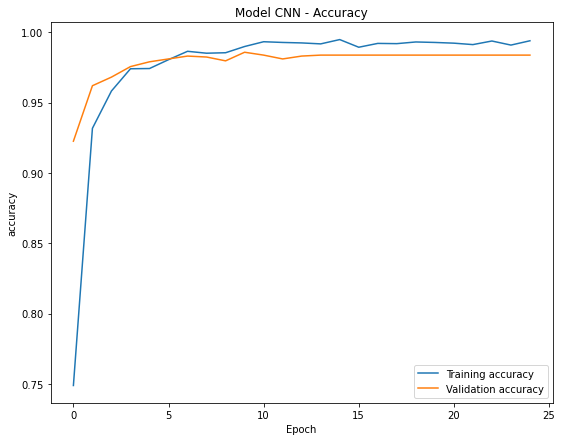

In [23]:
#Reshape Data sets for Conv1D
data_train_reshaped = data_train.reshape(data_train.shape[0],data_train.shape[1],1)#input dimension is 1
data_test_reshaped = data_test.reshape(data_test.shape[0],data_test.shape[1],1)

model_CNN = CNN(data_train_reshaped)
model_CNN.summary()

model_CNN = Compile(model_CNN)
history_CNN, model_CNN = Fit(model_CNN, data_train_reshaped, label_train, "cnn")
PLOT(history_CNN, "CNN")

In [24]:
cnn_loss, cnn_accuracy = model_CNN.evaluate(data_test_reshaped, label_test, verbose=1)
print('Model Loss: %.2f, Accuracy: %.2f' % ((cnn_loss*100),(cnn_accuracy*100)))

93/93 [==============================] - 1s 14ms/step - loss: 0.2129 - accuracy: 0.9243
Model Loss: 21.29, Accuracy: 92.43


SyntaxError: invalid syntax (Temp/ipykernel_7352/1816946933.py, line 1)